## Разведочный анализ данных (EDA)

- **Загрузка данных**
  - Загрузить данные из CSV файла.

- **Анализ типов данных**
  - Проверка типов данных для каждого столбца в наборе данных.

- **Обнаружение и удаление дубликатов**
  - Поиск дубликатов в данных и удаление.

- **Проверка на пропуски**
  - Проверка пропущенных значении в данных.

- **Дескриптивная статистика**
  - Основные статистические характеристики для числовых признаков (среднее, медиана, стандартное отклонение и т.д.).

- **Визуализация данных и интерпретация**
  - Гистограммы для числовых признаков.
  - Визуализация распределении категориальных признаков.
  - Интерпретация визуализации для выявления паттернов в данных.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, probplot

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

### Загрузка данных

In [3]:
df = pd.read_csv('/Users/duimagambetovaa/Desktop/insurance project/data/raw/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Тип данных

В данных три **категориальных** признака:
- **sex** (тип данных: object) — пол клиента (female / male).
- **smoker** (тип данных: object) — курит ли клиент (yes / no).
- **region** (тип данных: object) — регион проживания клиента (southeast, southwest, northwest, northeast).

*- Для них может понадобиться кодирование.*

Также в данных есть следующие **числовые** признаки:
- **age** (тип данных: int64) — возраст клиента.
- **bmi** (тип данных: float64) — индекс массы тела.
- **children** (тип данных: int64) — количество детей.

Целевая переменная:
- **charges** (тип данных: float64 (continuous)) — сумма страховых выплат.


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Пропуски

*В данных нет пропусков.*

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Дупликаты

*Есть 1 дупликат.*

In [6]:
duplicates = df[df.duplicated()]
print(f"Найдено {duplicates.shape[0]} дубликатов.")

Найдено 1 дубликатов.


In [7]:
dupe_mask = df.duplicated(keep=False) # Отобразим его...
duplicates = df[dupe_mask].sort_values(by=list(df.columns))
display(duplicates)

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df = df.drop_duplicates() # Удаляем...

### Дескриптивная статистика числовых признаков

- В выборке **1337 человек**.

Возраст (age):
- **Средний возраст** — 39 лет, данные разбросаны ±14 лет от среднего.
- **Минимальный возраст** — 18 лет, **максимальный возраст** — 64 года.
- **Распределение симметричное** — равное количество молодых, зрелых и пожилых людей.

Индекс массы тела (BMI):
- **Средний BMI** близок к границе ожирения (≥30).
- Диапазон BMI от **сильного дефицита массы** до **тяжелого ожирения**: [15.96 - 53.13].
- **50% людей** имеют BMI в пределах **нормы/избыточного веса**.

Дети (children):
- **В среднем** — наличие **1 ребенка**.
- Есть клиенты без детей (0) и с максимальным количеством (5).
- Половина клиентов имеют не более **1 ребенка**, а **25% не имеют детей**.

Сумма страховых выплат (charges):
- **Средняя выплата** по страхованию — **13 тысяч**.
- **Большой разброс** данных.
- **Медиана** — 9386, и только **25% клиентов** платят больше **16657**.
- **Минимум** — 1121, **максимум** — 63770.


In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### Визуализация данных 

#### Числовые признаки

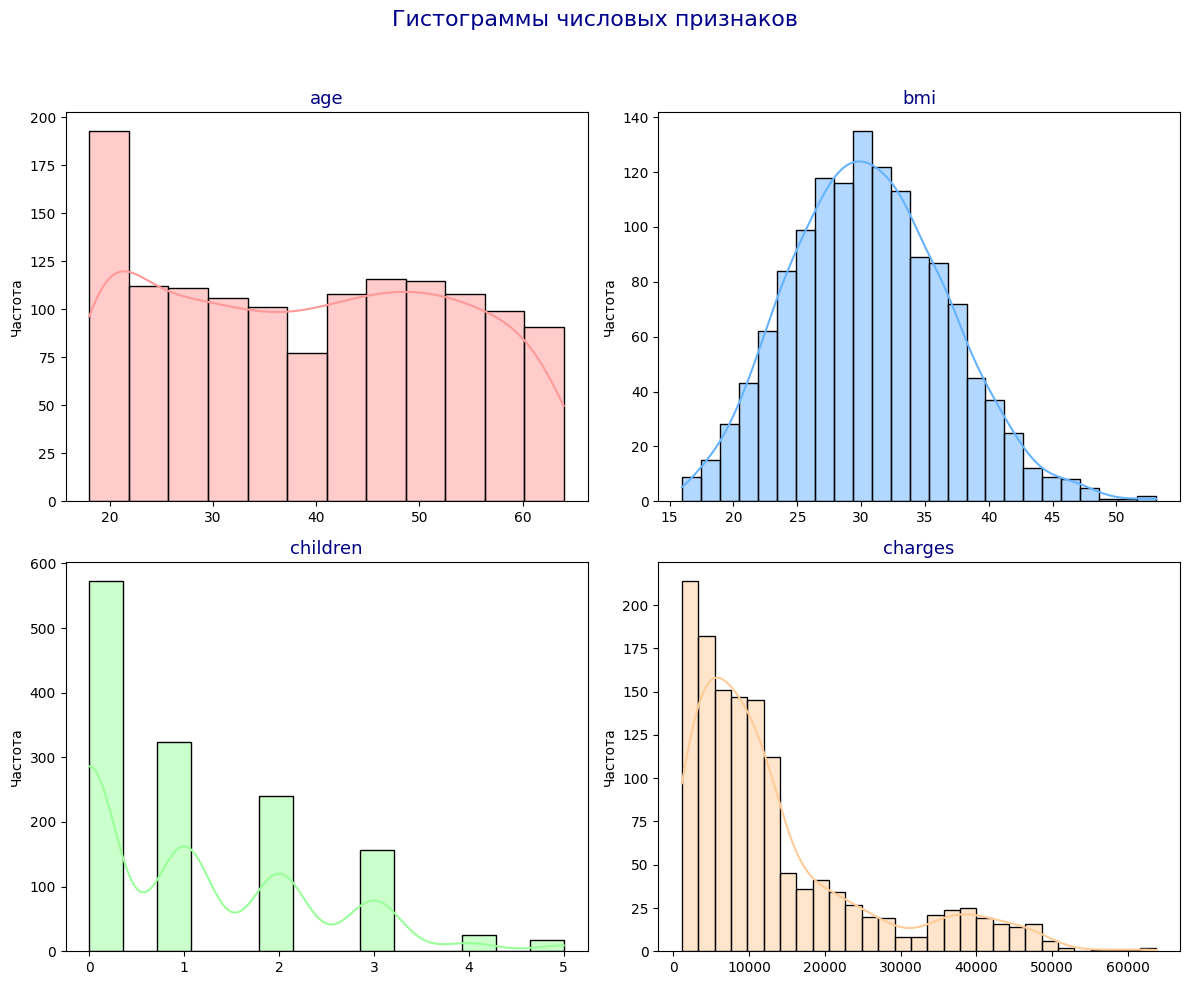

In [10]:
num_cols = ['age', 'bmi', 'children', 'charges']
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']  

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  
fig.suptitle("Гистограммы числовых признаков", fontsize=16, color='darkblue')

for ax, col, color in zip(axes.flat, num_cols, colors):
    sns.histplot(df[col], kde=True, ax=ax, color=color, edgecolor='black')
    ax.set_title(f'{col}', fontsize=13, color='navy')
    ax.set_xlabel('')
    ax.set_ylabel('Частота')
    ax.grid(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

##### Интерпретация гистограмм числовых признаков

**Возраст:**
- Распределение возраста клиентов довольно равномерное, с небольшим пиком в 20 лет, что может свидетельствовать о том, что много молодых людей участвуют в программе.
- Распределение близко к нормальному, с небольшим смещением на молодые и зрелые возрастные группы.

**Индекс массы тела:**
- Гистограмма для BMI показывает **нормальное распределение**, где пик находится около значения 30. Это подтверждает, что многие клиенты имеют индекс массы тела в пределах избыточного веса или на границе ожирения.
- Примечание: гистограмма имеет плавное распределение, что также подтверждает наличие симметрии.

**Количество детей:**
- Гистограмма показывает, что большинство клиентов имеют **0 детей**, за ними следуют клиенты с 1 и 2 детьми. Клиентов с 3 или более детьми — гораздо меньше.
- Это подтверждает, что в выборке доминируют семьи без детей или с одним ребенком.

**Сумма страховых выплат:**
- Гистограмма для **страховых выплат** имеет явное **правостороннее смещение** (skew), что означает, что большинство клиентов платят относительно низкие суммы (меньше 10,000), в то время как несколько клиентов делают высокие выплаты.
- Это распределение подтверждает, что количество клиентов, которые платят высокие страховые взносы, значительно меньше.


#### Категориальные признаки

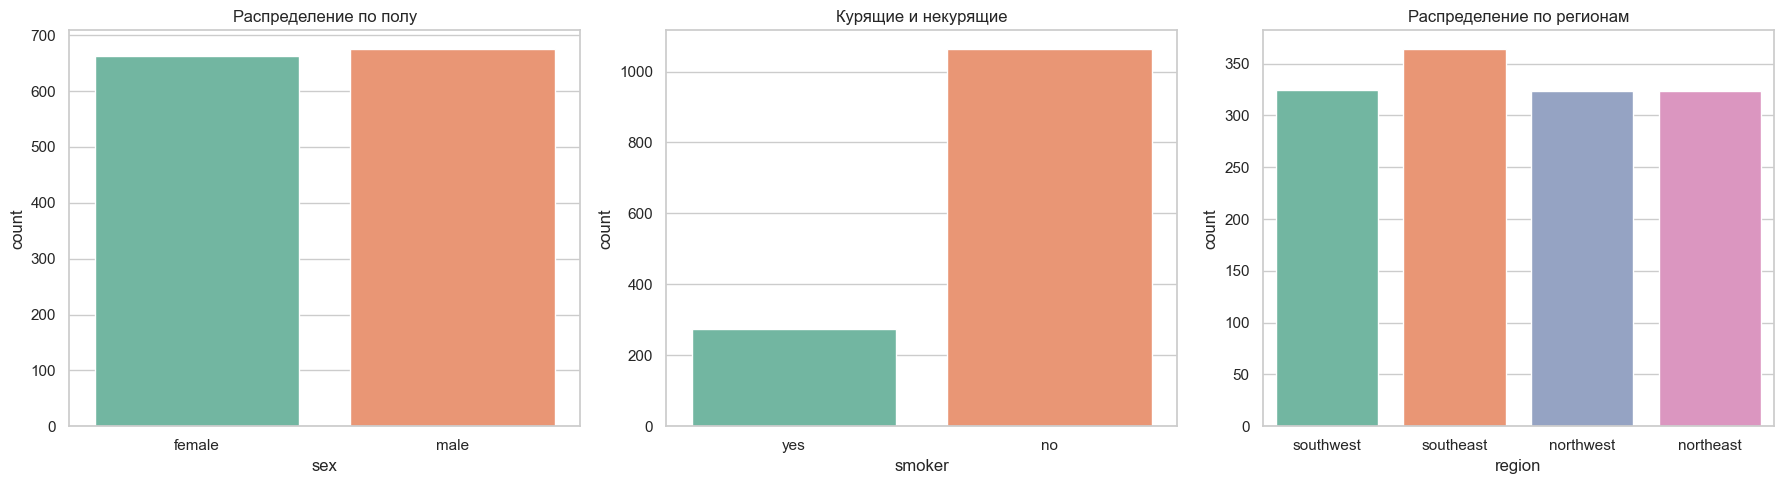

In [11]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x="sex", hue="sex", palette="Set2", dodge=False, ax=axes[0])
axes[0].set_title("Распределение по полу")

sns.countplot(data=df, x="smoker", hue="smoker", palette="Set2", dodge=False, ax=axes[1])
axes[1].set_title("Курящие и некурящие")

sns.countplot(data=df, x="region", hue="region", palette="Set2", dodge=False, ax=axes[2])
axes[2].set_title("Распределение по регионам")

# Для избегания предупреждении...
for ax in axes:
    if ax.get_legend():
        ax.legend_.remove()

plt.tight_layout()
plt.show()

##### Интерпретация распределений категориальных признаков

Распределение по полу (sex):
- Гистограмма показывает, что количество **мужчин** в выборке чуть больше, чем **женщин**. Однако разница незначительная, что говорит о сбалансированном распределении по полу в данных.

Курящие и некурящие (smoker):
- Из графика видно, что большинство клиентов — **некурящие**. Количество **курящих** значительно меньше, что также подтверждается доминированием одной категории (некурящих).

Распределение по регионам (region):
- Гистограмма показывает, что клиенты равномерно распределены по **регионам**. Наибольшее количество клиентов проживает в **юго-западном регионе** (southwest), следом идут **юго-восточный** (southeast), **северо-западный** (northwest) и **северо-восточный** (northeast) регионы, с небольшими различиями по количеству клиентов в каждом из них.


#####  Возраст

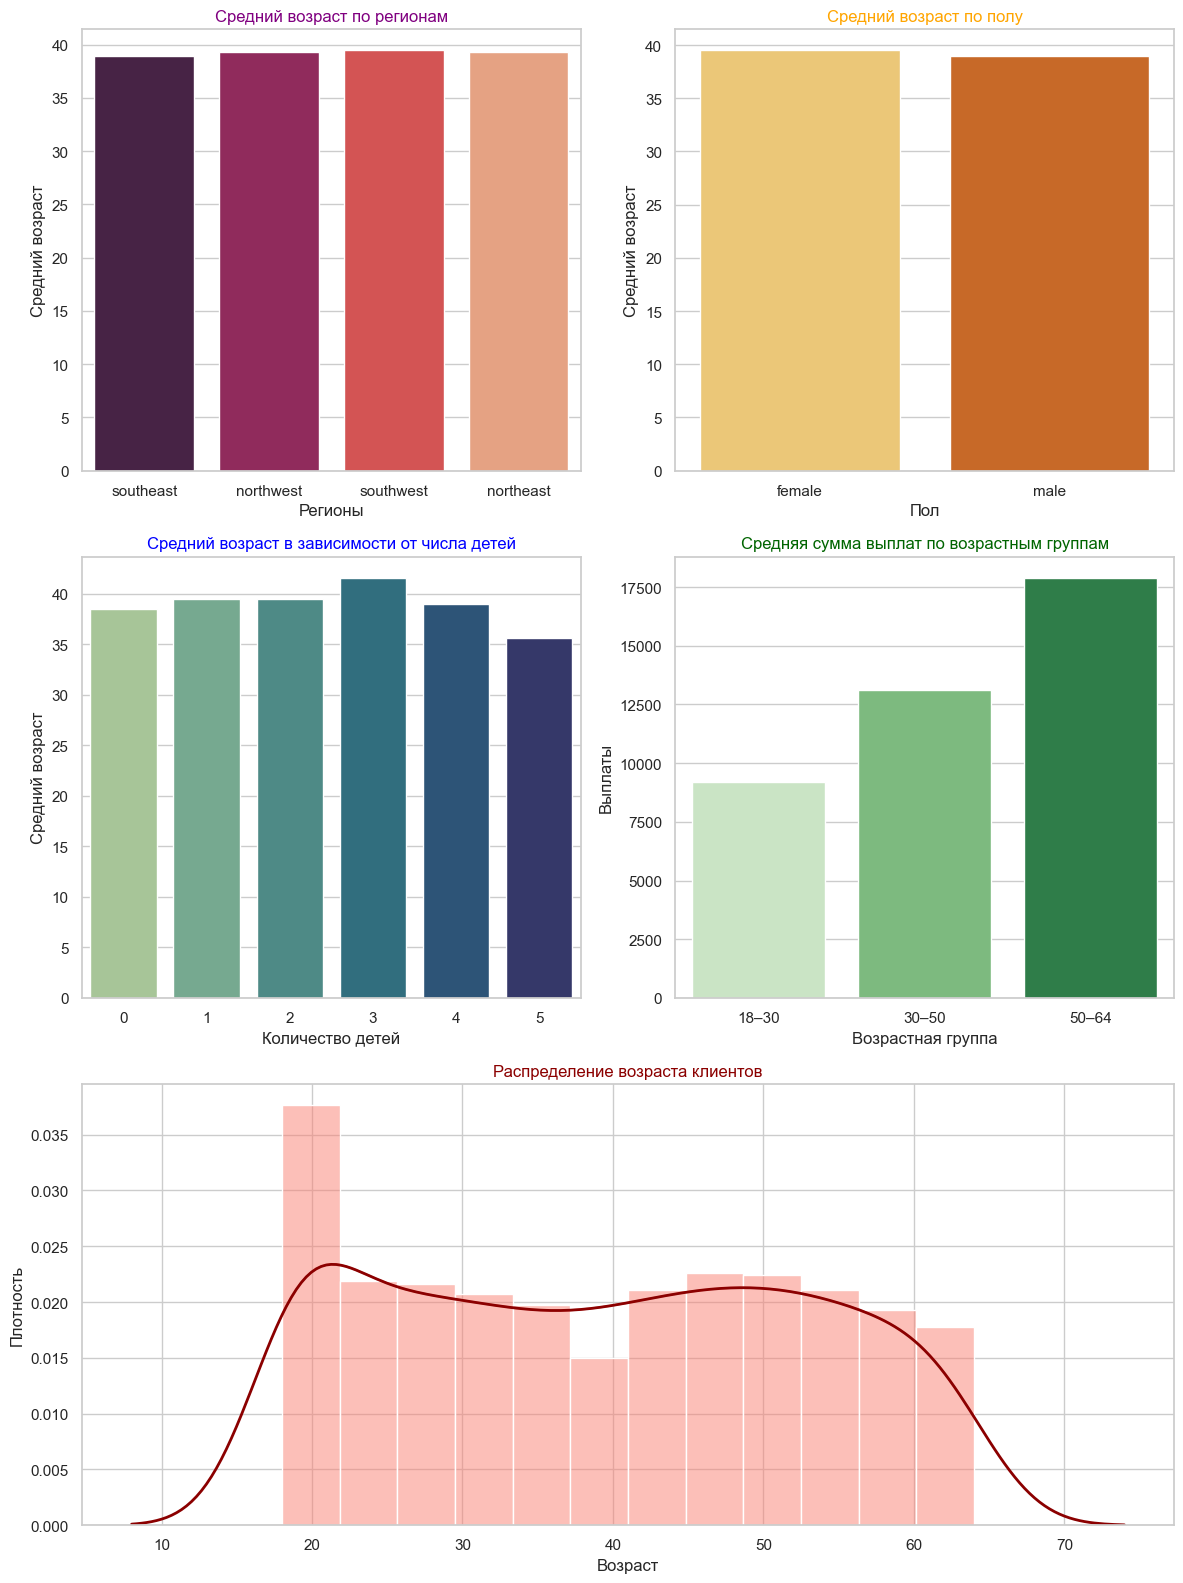

In [12]:
# Средний возраст по регионам, полу и количеству детей
regions = ["southeast", "northwest", "southwest", "northeast"]
children = [0, 1, 2, 3, 4, 5]
genders = ["female", "male"]

regionAgeMean = []
sexAgeMean = []
childAgeMean = []

for region in regions:
    x = df[df["region"] == region]
    regionAgeMean.append(x["age"].mean())

for gender in genders:
    y = df[df["sex"] == gender]
    sexAgeMean.append(y["age"].mean())

for child in children:
    z = df[df["children"] == child]
    childAgeMean.append(z["age"].mean())

# Средние выплаты по возрастным группам: 18–30, 30–50, 50–64
ageGroup1 = df[df["age"].between(18, 30, inclusive="left")]["charges"].mean()
ageGroup2 = df[df["age"].between(30, 50, inclusive="left")]["charges"].mean()
ageGroup3 = df[df["age"].between(50, 64, inclusive="both")]["charges"].mean()

averageAgeCharges = [ageGroup1, ageGroup2, ageGroup3]
ageRanges = ["18–30", "30–50", "50–64"]

# Построение графиков
plt.figure(figsize=(12, 16))

plt.subplot(3, 2, 1)
sns.barplot(x=regions, y=regionAgeMean, hue=regions, palette="rocket", legend=False)
plt.title("Средний возраст по регионам", color="purple")
plt.xlabel("Регионы")
plt.ylabel("Средний возраст")

plt.subplot(3, 2, 2)
sns.barplot(x=genders, y=sexAgeMean, hue=genders, palette="YlOrBr", legend=False)
plt.title("Средний возраст по полу", color="orange")
plt.xlabel("Пол")
plt.ylabel("Средний возраст")

plt.subplot(3, 2, 3)
sns.barplot(x=children, y=childAgeMean, hue=children, palette="crest", legend=False)
plt.title("Средний возраст в зависимости от числа детей", color="blue")
plt.xlabel("Количество детей")
plt.ylabel("Средний возраст")

plt.subplot(3, 2, 4)
sns.barplot(x=ageRanges, y=averageAgeCharges, hue=ageRanges, palette="Greens", legend=False)
plt.title("Средняя сумма выплат по возрастным группам", color="darkgreen")
plt.xlabel("Возрастная группа")
plt.ylabel("Выплаты")

plt.subplot(3, 2, (5, 6))
sns.histplot(df["age"], kde=True, stat="density", color="salmon")
sns.kdeplot(df["age"], color="darkred", lw=2)
plt.title("Распределение возраста клиентов", color="darkred")
plt.xlabel("Возраст")
plt.ylabel("Плотность")

plt.tight_layout()
plt.show()

###### Интерпретация графиков

**Средний возраст по регионам**: 
  - Средний возраст схож во всех регионах, с незначительными колебаниями между юго-восточным и северо-западным регионами.

**Средний возраст по полу**: 
  - Разница в среднем возрасте между мужчинами и женщинами минимальна.

**Средний возраст в зависимости от количества детей**:
  - Клиенты с 5 детьми имеют немного более низкий средний возраст. Остальные группы показывают схожие значения. Возможно, так как не так много клиентов с 5 детьми.

**Средняя сумма выплат по возрастным группам**:
  - Выплаты увеличиваются с возрастом, с наибольшими суммами в группе 50-64 года.

**Распределение возраста клиентов**:
  - Пик сосредоточен в возрасте около 20 лет, с плавным спадом по мере увеличения возраста.


##### Выплаты

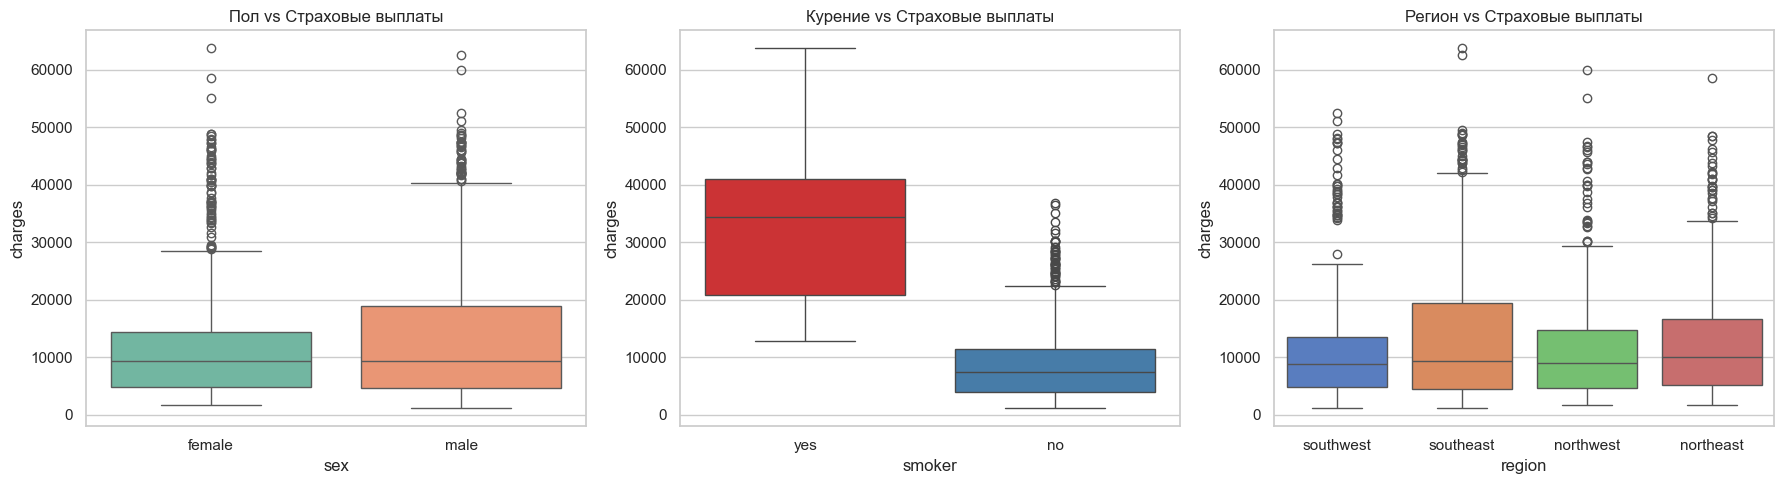

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_settings = [
    {"x": "sex", "hue": "sex", "palette": "Set2", "title": "Пол vs Страховые выплаты"},
    {"x": "smoker", "hue": "smoker", "palette": "Set1", "title": "Курение vs Страховые выплаты"},
    {"x": "region", "hue": "region", "palette": "muted", "title": "Регион vs Страховые выплаты"},
]

for ax, setting in zip(axes, plot_settings):
    sns.boxplot(data=df, x=setting["x"], y="charges", hue=setting["hue"], palette=setting["palette"], ax=ax)
    ax.set_title(setting["title"])
    if ax.get_legend():
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

###### Интерпретация графиков

**Пол vs Страховые выплаты**:
  - У **мужчин** присутствуют более высокие выплаты.

**Курение vs Страховые выплаты**:
  - **Курящие** клиенты имеют значительно более высокие **выплаты** по сравнению с **некурящими**.

**Регион vs Страховые выплаты**:
  - В **юго-западном регионе (southwest)** выплаты имеют наименьшие медианные значения.
  - **Юго-восточный (southeast)** и **северо-восточный (northeast)** регионы показывают более высокие медианные выплаты, что может указывать на более высокие затраты на медицинские услуги в этих регионах.
  - **Северо-западный регион (northwest)** имеет выплаты на уровне юго-восточного, но с небольшим количеством выбросов.
  - Во всех регионах наблюдаются выбросы, что подтверждает наличие экстремальных случаев, требующих значительных выплат.

##### Пол и курение

Text(0.5, 1.0, 'Влияние пола и курения на выплаты')

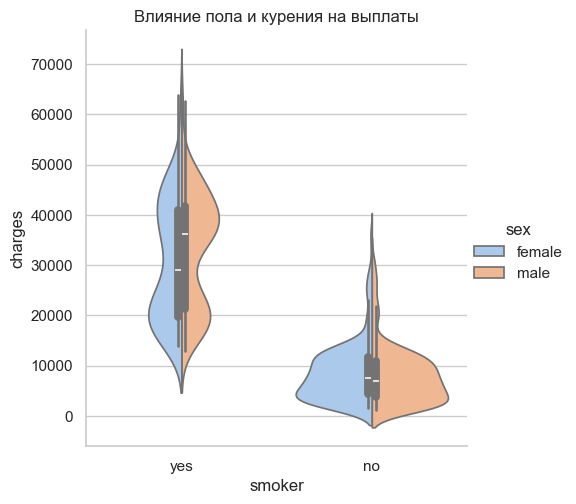

In [14]:
sns.catplot(data=df, x="smoker", y="charges", hue="sex", kind="violin", split=True, palette="pastel")
plt.title("Влияние пола и курения на выплаты")

###### Интерпретация графика

- **Курение** имеет явное влияние на размер выплат - более высокие выплаты для курящих клиентов, равное по половому признаку.


## Препроцессинг данных

### Кодирование категориальных признаков

In [15]:
# sex (female (0), male (1))
df["sex"] = [0 if i == "female" else 1 for i in df["sex"]]
df = pd.get_dummies(df, columns=["sex"], dtype=int)

# children 
df["children"] = df["children"].astype("category")
df = pd.get_dummies(df, columns=["children"], prefix="children", dtype=int)

# smoker or not
df["smoker"] = [0 if i == "no" else 1 for i in df["smoker"]]
df["smoker"] = df["smoker"].astype("category")
df = pd.get_dummies(df, columns=["smoker"], prefix="smoker", dtype=int)

# region
region_map = {
    "southeast": 1,
    "southwest": 2,
    "northwest": 3,
    "northeast": 4
}

df["region"] = df["region"].map(region_map)
df["region"] = df["region"].astype("category")
df = pd.get_dummies(df, columns=["region"], prefix="region", dtype=int)

df.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_1,region_2,region_3,region_4
0,19,27.900,16884.92400,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,18,33.770,1725.55230,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,28,33.000,4449.46200,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,33,22.705,21984.47061,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,32,28.880,3866.85520,0,1,1,0,0,0,0,0,1,0,0,0,1,0


### Логарифмирование charges

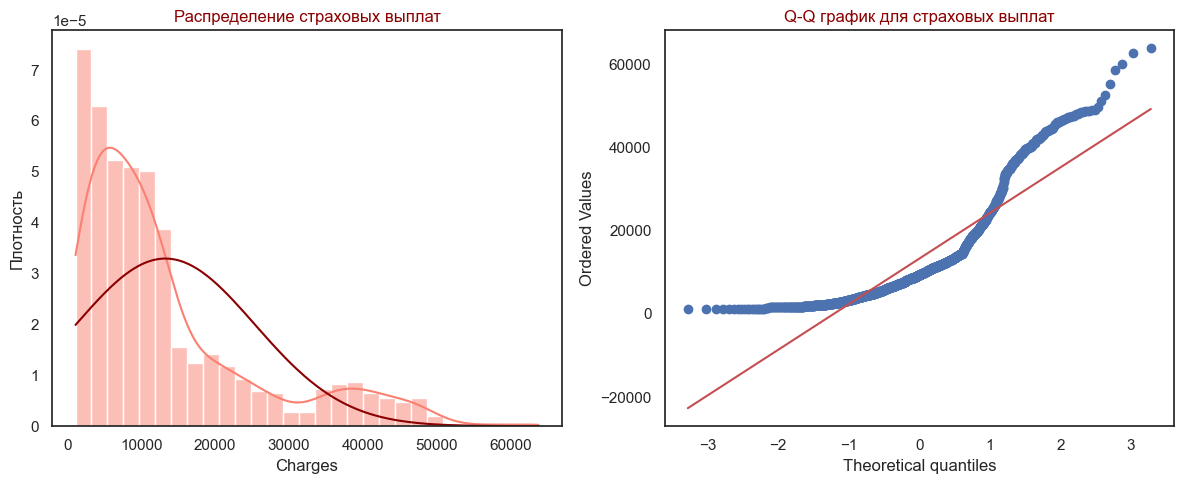

In [16]:
sns.set(style="white")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["charges"], kde=True, stat="density", color="salmon")
sns.lineplot(x=sorted(df["charges"]), y=norm.pdf(sorted(df["charges"]), loc=df["charges"].mean(), scale=df["charges"].std()), color="darkred")
plt.title("Распределение страховых выплат", fontsize=12, color="darkred")
plt.xlabel("Charges")
plt.ylabel("Плотность")

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(df["charges"], dist="norm", plot=plt)
plt.title("Q-Q график для страховых выплат", fontsize=12, color="darkred")

plt.tight_layout()
plt.show()

 Применение логарифма помогает сгладить распределение данных, особенно если они имеют сильное правостороннее смещение (skew). В случае, когда есть выбросы или экстремальные значения (клиенты с очень высокими страховыми выплатами), логарифмирование позволяет уменьшить влияние этих выбросов и сделать распределение более нормальным.

In [17]:
df["charges"] = np.log1p(df["charges"])

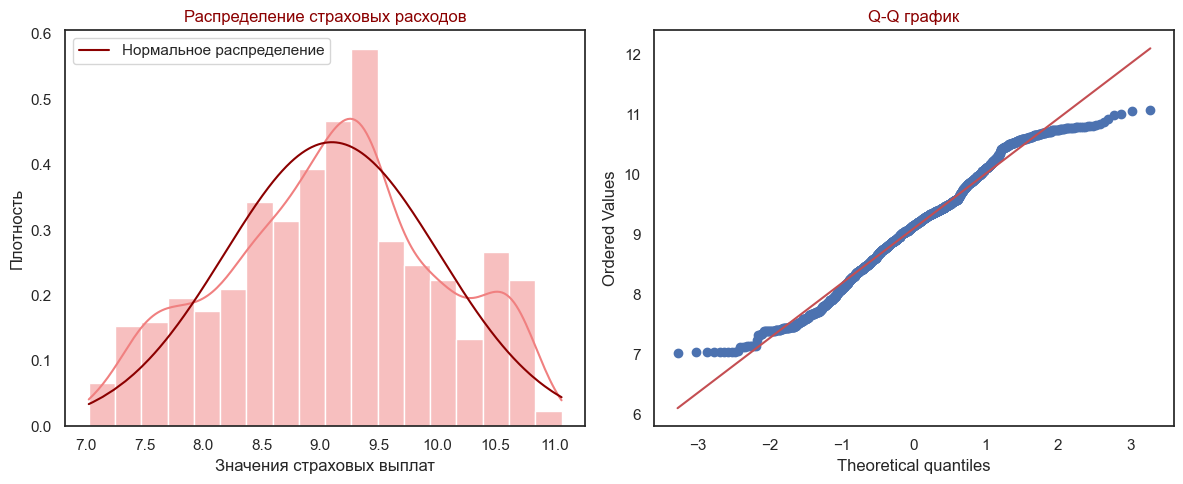

In [18]:
sns.set_style("white") 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["charges"], kde=True, stat="density", color="lightcoral")
mean = df["charges"].mean()
std = df["charges"].std()
x_vals = sorted(df["charges"])
sns.lineplot(x=x_vals, y=norm.pdf(x_vals, mean, std), color="darkred", label="Нормальное распределение")
plt.title("Распределение страховых расходов", fontsize=12, color="darkred")
plt.xlabel("Значения страховых выплат")
plt.ylabel("Плотность")

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(df["charges"], dist="norm", plot=plt)
plt.title("Q-Q график", fontsize=12, color="darkred")

plt.tight_layout()
plt.show()

### Масштабирование числовых признаков

In [19]:
scaler = StandardScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])

In [20]:
df.head()

,age,bmi,charges,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_1,region_2,region_3,region_4
0,-1.440418,-0.453160,9.734236,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,-1.511647,0.509422,7.453882,0,1,0,1,0,0,0,0,1,0,1,0,0,0
2,-0.799350,0.383155,8.400763,0,1,0,0,0,1,0,0,1,0,1,0,0,0
3,-0.443201,-1.305052,9.998137,0,1,1,0,0,0,0,0,1,0,0,0,1,0
4,-0.514431,-0.292456,8.260455,0,1,1,0,0,0,0,0,1,0,0,0,1,0


## Корреляции

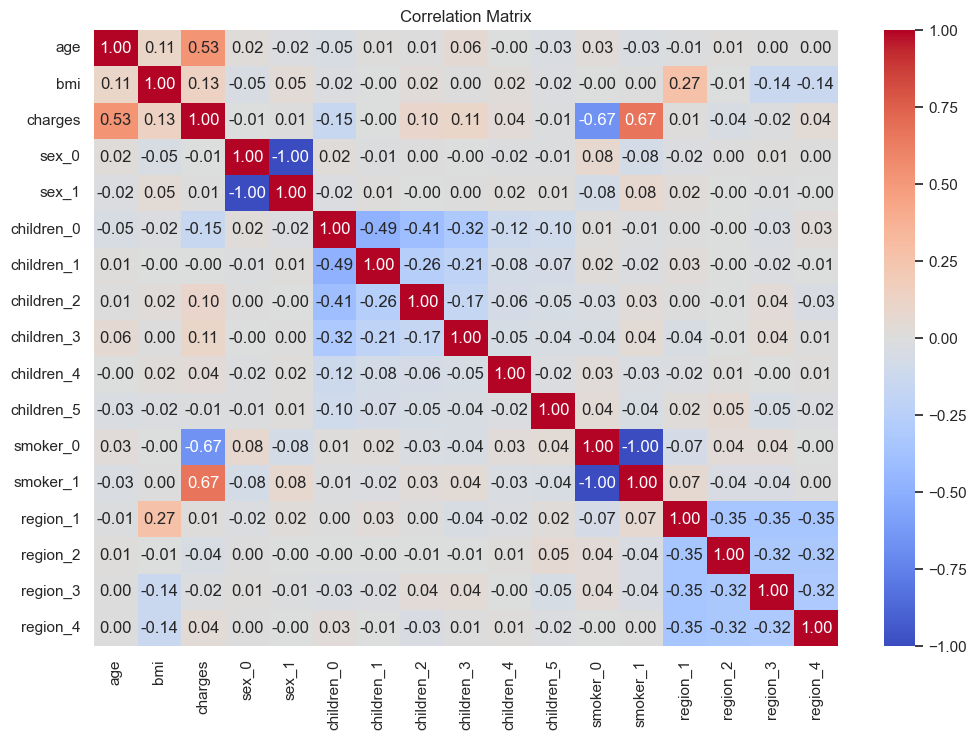

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Выплаты наглядно позитивно коррелируют с курящими, и возрастом.

## Тренировочные и тестовые выборки

In [22]:
X = df.drop('charges', axis = 1)
y = df['charges']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

### Обучение и оценка моделей

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Функция для тренировки модели
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    score_df = pd.DataFrame([[f'{accuracy:.4f}', f'{r2:.4f}', f'{mse:.2f}', f'{rmse:.2f}', f'{mae:.2f}']],
                            columns=["accuracy", "R2", "MSE", "RMSE", "MAE"])

    return score_df

# Список для результатов
results = []


                  accuracy      R2   MSE  RMSE   MAE
Linear Regression   0.8291  0.8291  0.16  0.40  0.27


#### Линейная регрессия

In [25]:
regressor = LinearRegression()
result = train_model(regressor, X_train, y_train, X_test, y_test)
result.index = ["Linear Regression"]
results.append(result)

print(result)

                  accuracy      R2   MSE  RMSE   MAE
Linear Regression   0.8291  0.8291  0.16  0.40  0.27


#### Градиентный бустинг

In [26]:
gradient_model = GradientBoostingRegressor()
GB_result = train_model(gradient_model, X_train, y_train, X_test, y_test)
GB_result.index = ["Gradient Boosting"]
results.append(GB_result)

#### Случайный лес

In [27]:
rf_model = RandomForestRegressor()
RF_result = train_model(rf_model, X_train, y_train, X_test, y_test)
RF_result.index = ["Random Forest"]
results.append(RF_result)

#### Полиномиальная регрессия

In [28]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_result = train_model(poly_model, X_train_poly, y_train, X_test_poly, y_test)
poly_result.index = ["Polynomial Regression"]
results.append(poly_result)

In [30]:
final_results = pd.concat(results)

print("\nFinal Model Performance Results:")
print(final_results)


Final Model Performance Results:
                      accuracy      R2   MSE  RMSE   MAE
Linear Regression       0.8291  0.8291  0.16  0.40  0.27
Linear Regression       0.8291  0.8291  0.16  0.40  0.27
Gradient Boosting       0.8830  0.8830  0.11  0.33  0.19
Random Forest           0.8566  0.8566  0.13  0.36  0.19
Polynomial Regression   0.8796  0.8796  0.11  0.33  0.20


## Итоговый анализ моделей

### Лучшие модели по всем метрикам:
- **Gradient Boosting** и **Polynomial Regression** являются лучшими моделями на основе всех представленных метрик.
- Оба метода дают очень близкие результаты, но **градиентный бустинг** немного лучше в плане **R2** и **MAE**.